In [42]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/C1_20230116015105_10110_00006119_L1G_PRGB_georeferencing_32652.tif"

#------ Coordinates filtering function
args.txt_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/1RCoordinate.txt"

args.xml_path = None


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0730.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0730_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0730_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0730.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0730.csv")
args.csv_output_scatter = args.img_path.replace(".png","_scatter_v1_0730.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped_240730_new"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS
time :  2023 1 16 10 51
202301161000_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202301161000_dynamic.csv
#------------------ : csv exists


In [2]:
# # get time

# from PIL import Image
# from PIL.TiffTags import TAGS

# with Image.open(args.tf_path ) as img:
#     meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}

# import rasterio
# meta_dict_r = rasterio.open(args.tf_path)

In [3]:
# '''
# raterio 로, tif 에서 spatial-resolution 찾는 방법
# 아니면 그냥 xml 들어가서 "gsd" 로 키워드 찾으면 나온다. 


# Metadata:
  
#   TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)

# '''

# meta_dict_r.res



In [4]:
from datetime import datetime

# Your input string
input_string =  str(args.year_) + str(args.month_) + str(args.day_) + str(args.hour_) +  str(args.min)

# Specify the format of the input string
input_format = "%Y%m%d%H%M"

# Convert the string to a datetime object
datetime_object = datetime.strptime(input_string, input_format)

# Now you have a datetime object, and you can work with it as needed
print(datetime_object)


2023-01-16 10:51:00


In [5]:
input_string

'202301161051'

In [6]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

In [7]:
img_.size

(29600, 28880)

In [8]:
!nvidia-smi

Tue Jul 30 15:12:10 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|


|   0  NVIDIA GeForce ...  On   | 00000000:3B:00.0 Off |                  N/A |
|  0%   27C    P8    21W / 350W |      6MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:5E:00.0 Off |                  N/A |
|  0%   26C    P8    21W / 350W |      6MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   2  NVIDIA GeForce ...  On   | 00000000:86:00.0 Off |                  N/A |
|  0%   26C    P8    18W / 350W |      6MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   3  NVIDIA GeForce ...  On   | 000000

# 1. Model Inference

In [9]:
import aPack_model

#0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS

if args.model_test:
    result = aPack_model.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [10]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [11]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-01-16 10:46:00
now :  2023-01-16 10:51:00
late :  2023-01-16 10:56:00


In [12]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [13]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [14]:
df

mmsi_                 time        long        lat  heading_  turn_  \
0      440007170  2023-01-16 10:00:00  129.032670  35.071972       511 -128.0   
1      440190820  2023-01-16 10:00:00  129.050270  35.119858        20 -128.0   
2      440108200  2023-01-16 10:00:00  129.052467  35.120245       511 -128.0   
3      440031780  2023-01-16 10:00:00  129.050917  35.123580       511 -128.0   
4      440116720  2023-01-16 10:00:00  129.071547  35.117807       158 -128.0   
...          ...                  ...         ...        ...       ...    ...   
30742  440111222  2023-01-16 10:59:59  129.070678  35.135603       511 -128.0   
30743  273416240  2023-01-16 10:59:59  129.057805  35.101987       511 -128.0   
30744  440314380  2023-01-16 10:59:59  129.092745  35.034843       511 -128.0   
30745  440713100  2023-01-16 10:59:59  129.069178  35.110635        34    0.0   
30746  440300740  2023-01-16 10:59:59  129.049653  35.120563       511 -128.0   

       speed_  
0        12.8  
1         0.0  
2         0.0  
3         0.0  
4         0.1  
...       ...  
30742     0.0  
30743     0.0  
30744     0.6  
30745     0.1  
30746     0.0  

[30747 rows x 7 columns]

In [15]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [16]:
t_df

mmsi_                 time        long        lat  heading_  turn_  \
22937  273398450  2023-01-16 10:46:01  129.057750  35.101817       297    0.0   
22938  440010800  2023-01-16 10:46:01  129.063422  35.108048         5 -127.0   
22939  477444600  2023-01-16 10:46:01  129.169467  35.065572       289   -0.0   
22940  440571571  2023-01-16 10:46:01  129.063542  35.083848       511 -128.0   
22941  440328640  2023-01-16 10:46:01  129.069175  35.110590        36    0.0   
...          ...                  ...         ...        ...       ...    ...   
28256  440713100  2023-01-16 10:55:59  129.069168  35.110667        34    0.0   
28257  440314380  2023-01-16 10:55:59  129.092743  35.034820       511 -128.0   
28258  440123000  2023-01-16 10:55:59  129.071240  35.117672        38  127.0   
28259  440190820  2023-01-16 10:55:59  129.050277  35.119855        19 -128.0   
28260  440031780  2023-01-16 10:55:59  129.050928  35.123585       511 -128.0   

       speed_            datetime  
22937     0.0 2023-01-16 10:46:01  
22938     1.3 2023-01-16 10:46:01  
22939     9.7 2023-01-16 10:46:01  
22940     0.0 2023-01-16 10:46:01  
22941     0.0 2023-01-16 10:46:01  
...       ...                 ...  
28256     0.0 2023-01-16 10:55:59  
28257     0.7 2023-01-16 10:55:59  
28258     0.0 2023-01-16 10:55:59  
28259     0.0 2023-01-16 10:55:59  
28260     0.0 2023-01-16 10:55:59  

[5324 rows x 8 columns]

# 3. Coordinates filtering


In [17]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

128.995194 129.157638 35.0882324 35.1694387


# 3.1 공간해상도 구하기

- (max_long - min_long) / image_size of x 

In [18]:
x_max , y_max = img_.size

In [19]:
max_long - min_long

0.1624439999999936

In [20]:
# pixel 당 2.19 long
(max_long - min_long) / x_max

5.487972972972757e-06

In [21]:
# pixel 당 1.12 lat 
(max_lat - min_lat) / y_max

2.8118524930747253e-06

In [22]:
import math

def measure(lat1, lon1, lat2, lon2):
    # Radius of Earth in KM
    R = 6378.137
    
    # Convert degrees to radians
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon/2) * math.sin(dLon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    
    # Convert distance to meters
    return d * 1000

In [23]:
a_ = measure(20,max_long, 20, min_long)
print(a_)
meter_per_pixel = a_ / x_max
print(meter_per_pixel)

16992.633300230096
0.5740754493320979


In [36]:
# def measure_lat_lon_meter(lat1, lon1, lat2, lon2):
#     ar R = 6378.137; // Radius of earth in KM
#     var dLat = lat2 * Math.PI / 180 - lat1 * Math.PI / 180;
#     var dLon = lon2 * Math.PI / 180 - lon1 * Math.PI / 180;
#     var a = Math.sin(dLat/2) * Math.sin(dLat/2) +
#     Math.cos(lat1 * Math.PI / 180) * Math.cos(lat2 * Math.PI / 180) *
#     Math.sin(dLon/2) * Math.sin(dLon/2);
#     var c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a));
#     var d = R * c;

In [24]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [25]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
22937  273398450  2023-01-16 10:46:01  129.057750  35.101817       297    0.0   
22938  440010800  2023-01-16 10:46:01  129.063422  35.108048         5 -127.0   
22941  440328640  2023-01-16 10:46:01  129.069175  35.110590        36    0.0   
22942  440031780  2023-01-16 10:46:01  129.050888  35.123550       511 -128.0   
22943  440126080  2023-01-16 10:46:01  129.074807  35.089735       511 -128.0   
...          ...                  ...         ...        ...       ...    ...   
28255  273416240  2023-01-16 10:55:59  129.057807  35.101980       511 -128.0   
28256  440713100  2023-01-16 10:55:59  129.069168  35.110667        34    0.0   
28258  440123000  2023-01-16 10:55:59  129.071240  35.117672        38  127.0   
28259  440190820  2023-01-16 10:55:59  129.050277  35.119855        19 -128.0   
28260  440031780  2023-01-16 10:55:59  129.050928  35.123585       511 -128.0   

       speed_            datetime  
22937     0.0 2023-01-16 10:46:01  
22938     1.3 2023-01-16 10:46:01  
22941     0.0 2023-01-16 10:46:01  
22942     0.1 2023-01-16 10:46:01  
22943     0.1 2023-01-16 10:46:01  
...       ...                 ...  
28255     0.0 2023-01-16 10:55:59  
28256     0.0 2023-01-16 10:55:59  
28258     0.0 2023-01-16 10:55:59  
28259     0.0 2023-01-16 10:55:59  
28260     0.0 2023-01-16 10:55:59  

[3104 rows x 8 columns]

In [26]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


/tmp/ipykernel_2800607/3391268297.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/tmp/ipykernel_2800607/3391268297.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/tmp/ipykernel_2800607/3391268297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_

In [27]:
# # remove duplicate row 
# [i[1:-1] for i in q_df['time']]
# # pd.to_datetime( )

In [28]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0     273398450  2023-01-16 10:46:01  129.057750  35.101817       297    0.0   
1     440010800  2023-01-16 10:46:01  129.063422  35.108048         5 -127.0   
2     440328640  2023-01-16 10:46:01  129.069175  35.110590        36    0.0   
3     440031780  2023-01-16 10:46:01  129.050888  35.123550       511 -128.0   
4     440126080  2023-01-16 10:46:01  129.074807  35.089735       511 -128.0   
...         ...                  ...         ...        ...       ...    ...   
3099  273416240  2023-01-16 10:55:59  129.057807  35.101980       511 -128.0   
3100  440713100  2023-01-16 10:55:59  129.069168  35.110667        34    0.0   
3101  440123000  2023-01-16 10:55:59  129.071240  35.117672        38  127.0   
3102  440190820  2023-01-16 10:55:59  129.050277  35.119855        19 -128.0   
3103  440031780  2023-01-16 10:55:59  129.050928  35.123585       511 -128.0   

      speed_            datetime  \
0        0.0 2023-01-16 10:46:01   
1        1.3 2023-01-16 10:46:01   
2        0.0 2023-01-16 10:46:01   
3        0.1 2023-01-16 10:46:01   
4        0.1 2023-01-16 10:46:01   
...      ...                 ...   
3099     0.0 2023-01-16 10:55:59   
3100     0.0 2023-01-16 10:55:59   
3101     0.0 2023-01-16 10:55:59   
3102     0.0 2023-01-16 10:55:59   
3103     0.0 2023-01-16 10:55:59   

                                            utm_array          pixels  
0       (505263.2473488343, 3884335.802969722, 52, N)  (20650, 11371)  
1      (505779.7450187963, 3885027.1236268356, 52, N)  (19266, 12403)  
2      (506303.82914729713, 3885309.375824701, 52, N)  (18700, 13449)  
3     (504636.62377472053, 3886745.6142929085, 52, N)  (15823, 10120)  
4      (506818.8025006265, 3882996.9675790234, 52, N)  (23332, 14478)  
...                                               ...             ...  
3099  (505268.43175566685, 3884353.8823697963, 52, N)  (20614, 11382)  
3100   (506303.1853171135, 3885317.9145471836, 52, N)  (18683, 13448)  
3101   (506491.4482822057, 3886094.8903376353, 52, N)  (17127, 13824)  
3102    (504581.1598088213, 3886335.816272094, 52, N)  (16644, 10009)  
3103   (504640.2663615109, 3886749.4976026933, 52, N)  (15816, 10127)  

[3104 rows x 10 columns]

In [29]:
q_df.to_csv(args.csv_output_scatter,index=False)

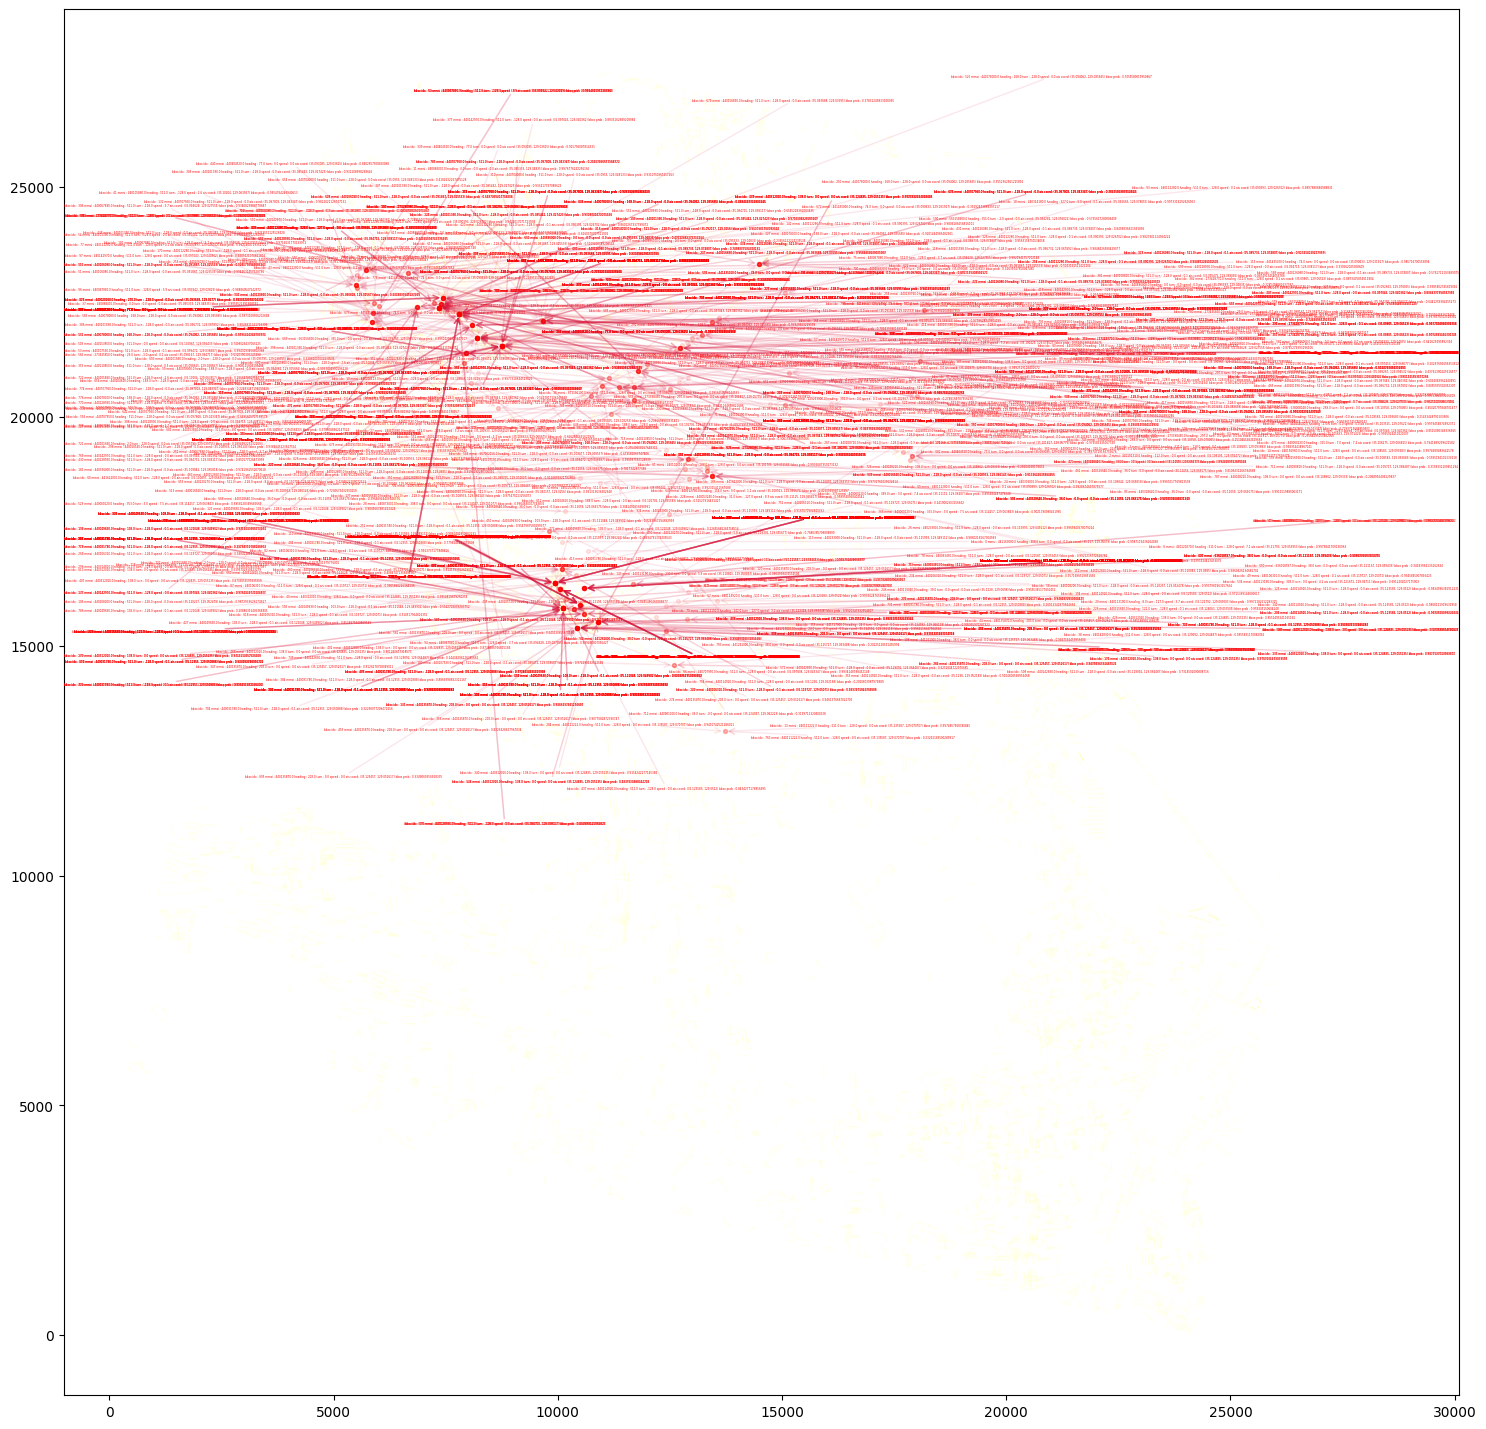

In [32]:
#------------------------------

# Code Backup ! 

#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
# debugged by Eric 
time_ais = [i for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_ ):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        'bbox prob' : [],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])
        S_['bbox prob'].append(box_[5])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    plt.savefig(args.img_output,dpi =800 )
    plt.show()

# Code Backup ! 

In [33]:
M_

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0             1  10179.683594  17276.537109  333.122589    52.600182   
1             2   8019.184082  20668.470703  231.906067    37.774815   
2             4  17644.548828  19293.230469  225.698883    40.862167   
3             5  17841.806641  19001.281250  107.723518    20.972467   
4             6  12990.855469  21599.408203  158.621964    32.854607   
...         ...           ...           ...         ...          ...   
7068       7068  18161.771484  12693.241211   98.229630    15.518679   
7069       7069   7197.584961   7035.023438  114.928513    17.464190   
7070       7070   9066.768555  13871.169922  206.715073    27.697983   
7071       7071  12286.789062  20078.960938  147.113693    34.869804   
7072       7072  17802.558594  13007.379883  306.799103    60.267365   

      bbox angle  bbox prob         mmsi  heading   turn  speed  \
0       0.628421   0.998712  441163000.0    308.0    0.0    0.0   
1       0.302294   0.998649  441362000.0    106.0    0.0    0.0   
2       0.406538   0.998524  440191310.0    112.0    0.0    0.0   
3       0.806699   0.998354  440156960.0    511.0 -128.0    0.0   
4      -0.981250   0.998339  440154720.0    511.0 -128.0    0.2   
...          ...        ...          ...      ...    ...    ...   
7068   -1.394590   0.200119          NaN      NaN    NaN    NaN   
7069   -0.132863   0.200081          NaN      NaN    NaN    NaN   
7070    0.036443   0.200035          NaN      NaN    NaN    NaN   
7071   -0.795417   0.200029          NaN      NaN    NaN    NaN   
7072   -1.311887   0.200026          NaN      NaN    NaN    NaN   

      ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                  10103               17278  35.117000  129.050790   
1                   8057               20735  35.101445  129.039542   
2                  17690               19229  35.108195  129.092472   
3                  17910               19142  35.108583  129.093683   
4                  12992               21715  35.097020  129.066650   
...                  ...                 ...        ...         ...   
7068                   0                   0   0.000000    0.000000   
7069                   0                   0   0.000000    0.000000   
7070                   0                   0   0.000000    0.000000   
7071                   0                   0   0.000000    0.000000   
7072                   0                   0   0.000000    0.000000   

                 ais time  
0     2023-01-16 10:48:15  
1     2023-01-16 10:48:28  
2     2023-01-16 10:46:10  
3     2023-01-16 10:46:01  
4     2023-01-16 10:46:03  
...                   ...  
7068                    0  
7069                    0  
7070                    0  
7071                    0  
7072                    0  

[7073 rows x 16 columns]

In [34]:
M_.iloc[0]['ais time']

'2023-01-16 10:48:15'

In [35]:
M_.to_csv(args.csv_output)
M_[0:10]

box index  bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0          1  10179.683594  17276.537109  333.122589    52.600182    0.628421   
1          2   8019.184082  20668.470703  231.906067    37.774815    0.302294   
2          4  17644.548828  19293.230469  225.698883    40.862167    0.406538   
3          5  17841.806641  19001.281250  107.723518    20.972467    0.806699   
4          6  12990.855469  21599.408203  158.621964    32.854607   -0.981250   
5          7   5871.970215  22542.533203  138.123062    25.870600    0.477601   
6          9  10850.931641  16873.429688  406.804382    68.494942    0.708813   
7         11  14663.147461  20215.708984  203.538666    40.524036    0.019692   
8         12  14987.956055  20220.769531  295.849365    46.265362    0.000518   
9         14   9630.651367  22050.445312  118.994919    24.142937   -1.361380   

   bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0   0.998712  441163000.0    308.0    0.0    0.0               10103   
1   0.998649  441362000.0    106.0    0.0    0.0                8057   
2   0.998524  440191310.0    112.0    0.0    0.0               17690   
3   0.998354  440156960.0    511.0 -128.0    0.0               17910   
4   0.998339  440154720.0    511.0 -128.0    0.2               12992   
5   0.998246  440067880.0    511.0 -128.0    5.9                6009   
6   0.997984  440120270.0    511.0 -128.0    7.1               10678   
7   0.997945  441654000.0    270.0    0.0    0.0               14733   
8   0.997861  538008048.0    269.0    0.0    0.0               15069   
9   0.997858  440886000.0      0.0    0.0    0.0                9661   

   ais y coord(pixel)    ais lat    ais long             ais time  
0               17278  35.117000  129.050790  2023-01-16 10:48:15  
1               20735  35.101445  129.039542  2023-01-16 10:48:28  
2               19229  35.108195  129.092472  2023-01-16 10:46:10  
3               19142  35.108583  129.093683  2023-01-16 10:46:01  
4               21715  35.097020  129.066650  2023-01-16 10:46:03  
5               22402  35.093942  129.028290  2023-01-16 10:48:25  
6               17071  35.117930  129.053953  2023-01-16 10:46:25  
7               20269  35.103525  129.076220  2023-01-16 10:48:28  
8               20256  35.103580  129.078065  2023-01-16 10:47:00  
9               22092  35.095333  129.048350  2023-01-16 10:46:08

In [36]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0     273398450  2023-01-16 10:46:01  129.057750  35.101817       297    0.0   
1     440010800  2023-01-16 10:46:01  129.063422  35.108048         5 -127.0   
2     440328640  2023-01-16 10:46:01  129.069175  35.110590        36    0.0   
3     440031780  2023-01-16 10:46:01  129.050888  35.123550       511 -128.0   
4     440126080  2023-01-16 10:46:01  129.074807  35.089735       511 -128.0   
...         ...                  ...         ...        ...       ...    ...   
3099  273416240  2023-01-16 10:55:59  129.057807  35.101980       511 -128.0   
3100  440713100  2023-01-16 10:55:59  129.069168  35.110667        34    0.0   
3101  440123000  2023-01-16 10:55:59  129.071240  35.117672        38  127.0   
3102  440190820  2023-01-16 10:55:59  129.050277  35.119855        19 -128.0   
3103  440031780  2023-01-16 10:55:59  129.050928  35.123585       511 -128.0   

      speed_            datetime  \
0        0.0 2023-01-16 10:46:01   
1        1.3 2023-01-16 10:46:01   
2        0.0 2023-01-16 10:46:01   
3        0.1 2023-01-16 10:46:01   
4        0.1 2023-01-16 10:46:01   
...      ...                 ...   
3099     0.0 2023-01-16 10:55:59   
3100     0.0 2023-01-16 10:55:59   
3101     0.0 2023-01-16 10:55:59   
3102     0.0 2023-01-16 10:55:59   
3103     0.0 2023-01-16 10:55:59   

                                            utm_array          pixels  
0       (505263.2473488343, 3884335.802969722, 52, N)  (20650, 11371)  
1      (505779.7450187963, 3885027.1236268356, 52, N)  (19266, 12403)  
2      (506303.82914729713, 3885309.375824701, 52, N)  (18700, 13449)  
3     (504636.62377472053, 3886745.6142929085, 52, N)  (15823, 10120)  
4      (506818.8025006265, 3882996.9675790234, 52, N)  (23332, 14478)  
...                                               ...             ...  
3099  (505268.43175566685, 3884353.8823697963, 52, N)  (20614, 11382)  
3100   (506303.1853171135, 3885317.9145471836, 52, N)  (18683, 13448)  
3101   (506491.4482822057, 3886094.8903376353, 52, N)  (17127, 13824)  
3102    (504581.1598088213, 3886335.816272094, 52, N)  (16644, 10009)  
3103   (504640.2663615109, 3886749.4976026933, 52, N)  (15816, 10127)  

[3104 rows x 10 columns]

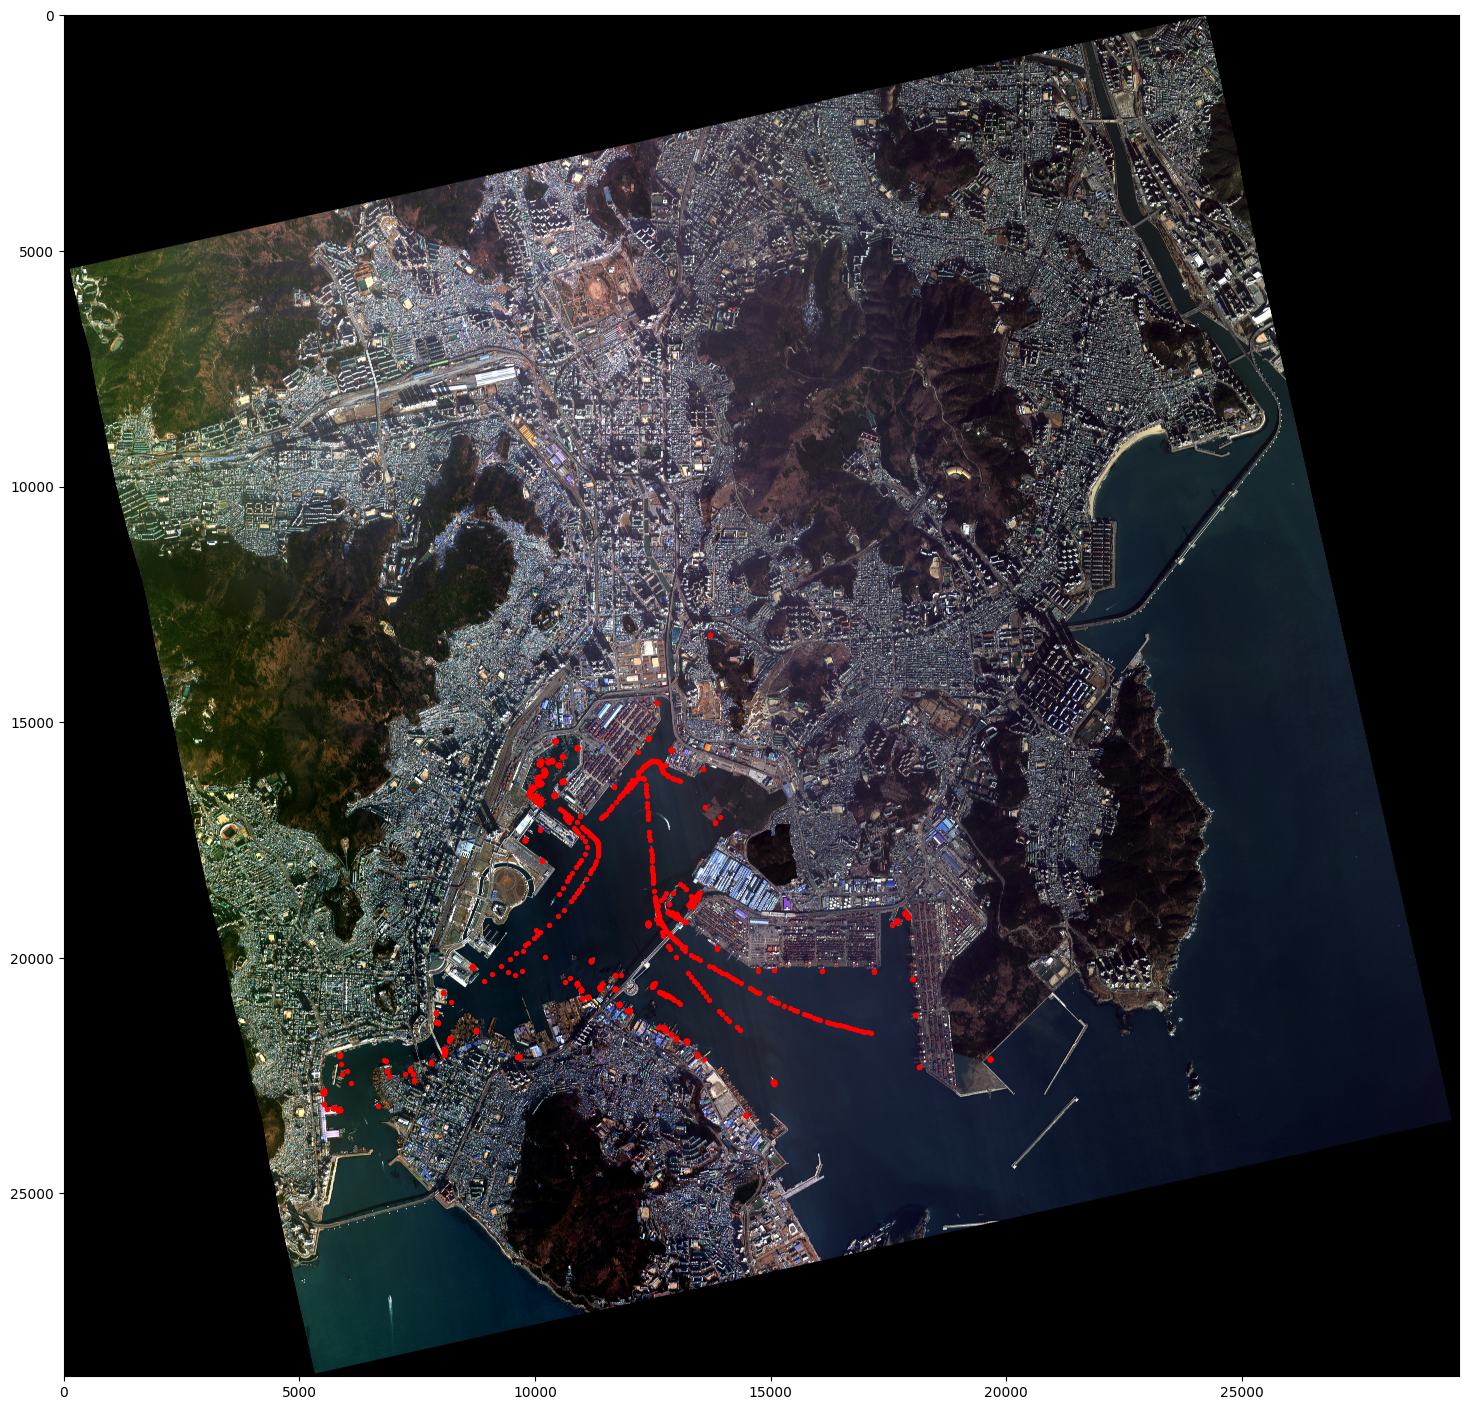

In [37]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

#plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [43]:
args.map_path
os.path.exists(args.map_path)

True

In [44]:
print(args.map_path)

/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped_240730_new


------------------- Eric Edited 


<Axes: >

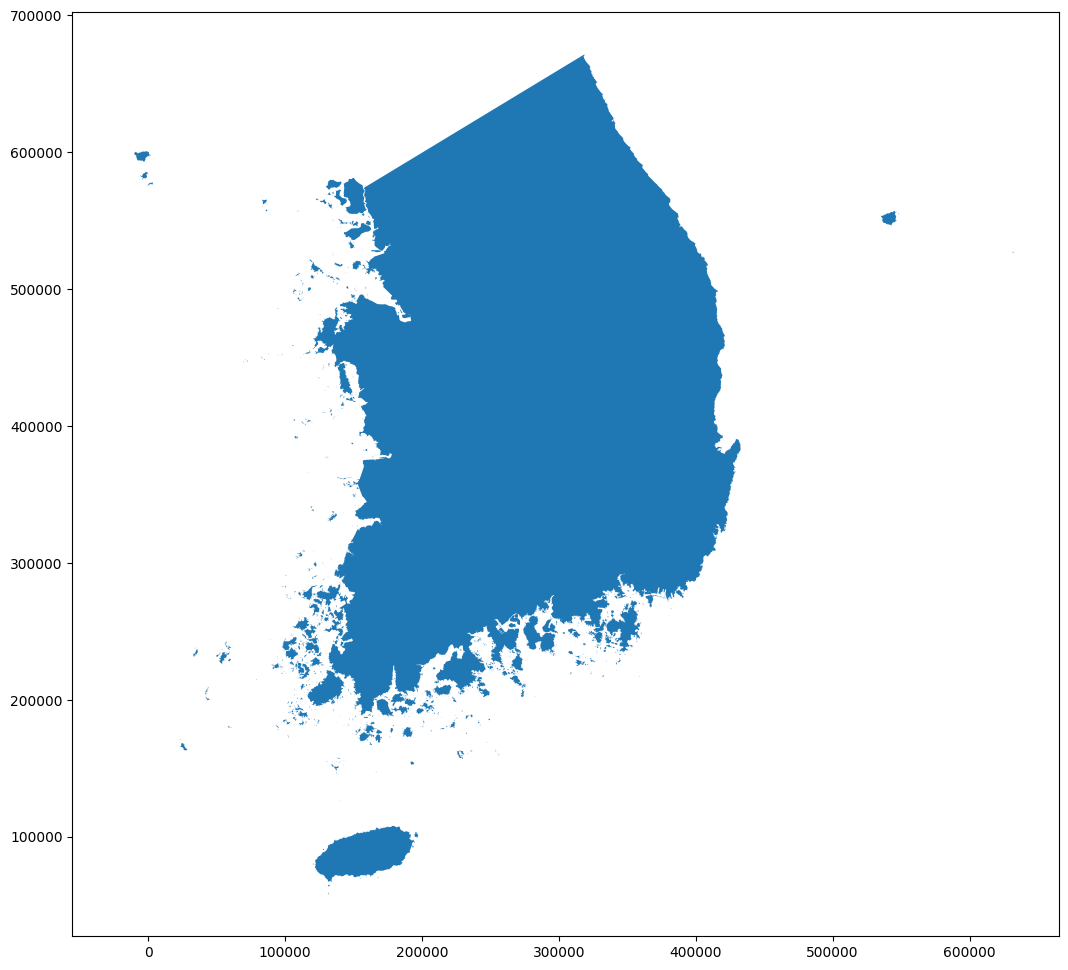

In [45]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [46]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  7073
progress :  1  /  7073
progress :  2  /  7073
progress :  3  /  7073
progress :  4  /  7073
progress :  5  /  7073
progress :  6  /  7073
progress :  7  /  7073
progress :  8  /  7073
progress :  9  /  7073
progress :  10  /  7073
progress :  11  /  7073
progress :  12  /  7073
progress :  13  /  7073
progress :  14  /  7073
progress :  15  /  7073
progress :  16  /  7073
progress :  17  /  7073
progress :  18  /  7073
progress :  19  /  7073
progress :  20  /  7073
progress :  21  /  7073
progress :  22  /  7073
progress :  23  /  7073
progress :  24  /  7073
progress :  25  /  7073
progress :  26  /  7073
progress :  27  /  7073
progress :  28  /  7073
progress :  29  /  7073
progress :  30  /  7073
progress :  31  /  7073
progress :  32  /  7073
progress :  33  /  7073
progress :  34  /  7073
progress :  35  /  7073
progress :  36  /  7073
progress :  37  /  7073
progress :  38  /  7073
progress :  39  /  7073
progress :  40  /  7073
progress :  41  /  7073
pr

In [47]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0             1  10179.683594  17276.537109  333.122589    52.600182   
1             2   8019.184082  20668.470703  231.906067    37.774815   
2             4  17644.548828  19293.230469  225.698883    40.862167   
3             5  17841.806641  19001.281250  107.723518    20.972467   
4             6  12990.855469  21599.408203  158.621964    32.854607   
...         ...           ...           ...         ...          ...   
7068       7068  18161.771484  12693.241211   98.229630    15.518679   
7069       7069   7197.584961   7035.023438  114.928513    17.464190   
7070       7070   9066.768555  13871.169922  206.715073    27.697983   
7071       7071  12286.789062  20078.960938  147.113693    34.869804   
7072       7072  17802.558594  13007.379883  306.799103    60.267365   

      bbox angle  bbox prob         mmsi  heading   turn  speed  \
0       0.628421   0.998712  441163000.0    308.0    0.0    0.0   
1       0.302294   0.998649  441362000.0    106.0    0.0    0.0   
2       0.406538   0.998524  440191310.0    112.0    0.0    0.0   
3       0.806699   0.998354  440156960.0    511.0 -128.0    0.0   
4      -0.981250   0.998339  440154720.0    511.0 -128.0    0.2   
...          ...        ...          ...      ...    ...    ...   
7068   -1.394590   0.200119          NaN      NaN    NaN    NaN   
7069   -0.132863   0.200081          NaN      NaN    NaN    NaN   
7070    0.036443   0.200035          NaN      NaN    NaN    NaN   
7071   -0.795417   0.200029          NaN      NaN    NaN    NaN   
7072   -1.311887   0.200026          NaN      NaN    NaN    NaN   

      ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                  10103               17278  35.117000  129.050790   
1                   8057               20735  35.101445  129.039542   
2                  17690               19229  35.108195  129.092472   
3                  17910               19142  35.108583  129.093683   
4                  12992               21715  35.097020  129.066650   
...                  ...                 ...        ...         ...   
7068                   0                   0   0.000000    0.000000   
7069                   0                   0   0.000000    0.000000   
7070                   0                   0   0.000000    0.000000   
7071                   0                   0   0.000000    0.000000   
7072                   0                   0   0.000000    0.000000   

                 ais time  
0     2023-01-16 10:48:15  
1     2023-01-16 10:48:28  
2     2023-01-16 10:46:10  
3     2023-01-16 10:46:01  
4     2023-01-16 10:46:03  
...                   ...  
7068                    0  
7069                    0  
7070                    0  
7071                    0  
7072                    0  

[7073 rows x 16 columns]

In [48]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0     10179.683594  17276.537109  333.122589    52.600182    0.628421   
1      8019.184082  20668.470703  231.906067    37.774815    0.302294   
2     17644.548828  19293.230469  225.698883    40.862167    0.406538   
3     17841.806641  19001.281250  107.723518    20.972467    0.806699   
4     12990.855469  21599.408203  158.621964    32.854607   -0.981250   
...            ...           ...         ...          ...         ...   
7068  18161.771484  12693.241211   98.229630    15.518679   -1.394590   
7069   7197.584961   7035.023438  114.928513    17.464190   -0.132863   
7070   9066.768555  13871.169922  206.715073    27.697983    0.036443   
7071  12286.789062  20078.960938  147.113693    34.869804   -0.795417   
7072  17802.558594  13007.379883  306.799103    60.267365   -1.311887   

      bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0      0.998712  441163000.0    308.0    0.0    0.0               10103   
1      0.998649  441362000.0    106.0    0.0    0.0                8057   
2      0.998524  440191310.0    112.0    0.0    0.0               17690   
3      0.998354  440156960.0    511.0 -128.0    0.0               17910   
4      0.998339  440154720.0    511.0 -128.0    0.2               12992   
...         ...          ...      ...    ...    ...                 ...   
7068   0.200119          NaN      NaN    NaN    NaN                   0   
7069   0.200081          NaN      NaN    NaN    NaN                   0   
7070   0.200035          NaN      NaN    NaN    NaN                   0   
7071   0.200029          NaN      NaN    NaN    NaN                   0   
7072   0.200026          NaN      NaN    NaN    NaN                   0   

      ais y coord(pixel)    ais lat    ais long             ais time  \
0                  17278  35.117000  129.050790  2023-01-16 10:48:15   
1                  20735  35.101445  129.039542  2023-01-16 10:48:28   
2                  19229  35.108195  129.092472  2023-01-16 10:46:10   
3                  19142  35.108583  129.093683  2023-01-16 10:46:01   
4                  21715  35.097020  129.066650  2023-01-16 10:46:03   
...                  ...        ...         ...                  ...   
7068                   0   0.000000    0.000000                    0   
7069                   0   0.000000    0.000000                    0   
7070                   0   0.000000    0.000000                    0   
7071                   0   0.000000    0.000000                    0   
7072                   0   0.000000    0.000000                    0   

      box index  
0             0  
1             1  
2             2  
3             3  
4             4  
...         ...  
7068       7068  
7069       7069  
7070       7070  
7071       7071  
7072       7072  

[7073 rows x 16 columns]

# Masked Visualization

In [49]:
args.img_output_masked

'/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G_output_v1_0730_Masked.png'

In [50]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0

# Label
plt_txts = []

# M_masked
for i,row in M_masked.iterrows():
    box_idx = row['box index']
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    prob_ = row['bbox prob']

    mmsi_ = row['mmsi']
    heading_ = row['heading']
    turn_ = row['turn']
    speed_ = row['speed']
    lat_ = row['ais lat']
    lon_ = row['ais long']

    
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

    # if (lat_ ==0) & (lon_ ==0):
    #     pass
    # else:
    name = f'bbox idx : {box_idx} mmsi : {mmsi_} heading : {heading_} turn : {turn_} speed : {speed_} ais coord: {lon_,lat_} bbox prob : {prob_}'
    plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


adjust_text(plt_txts, 
            force_points=3,
            arrowprops={'arrowstyle' : '->', 
                        'color' : 'crimson',  
                        'alpha' : 0.1}
            )
#------------------------------------

plt.imshow(img_)
plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()
#------------------------------------

#-------------- 0.0001
#-------------- 0.0003
#-------------- 0.0004
#-------------- 0.0006
#-------------- 0.0007
#-------------- 0.0008
#-------------- 0.0010
#-------------- 0.0011
#-------------- 0.0013
#-------------- 0.0014
#-------------- 0.0016
#-------------- 0.0017
#-------------- 0.0018
#-------------- 0.0020
#-------------- 0.0021
#-------------- 0.0023
#-------------- 0.0024
#-------------- 0.0025
#-------------- 0.0027
#-------------- 0.0028
#-------------- 0.0030
#-------------- 0.0031
#-------------- 0.0033
#-------------- 0.0034
#-------------- 0.0035
#-------------- 0.0037
#-------------- 0.0038
#-------------- 0.0040
#-------------- 0.0041
#-------------- 0.0042
#-------------- 0.0044
#-------------- 0.0045
#-------------- 0.0047
#-------------- 0.0048
#-------------- 0.0049
#-------------- 0.0051
#-------------- 0.0052
#-------------- 0.0054
#-------------- 0.0055
#-------------- 0.0057
#-------------- 0.0058
#-------------- 0.0059
#-------------- 0.0061
#----------

KeyboardInterrupt: 

# Extract Chips

In [55]:
# #----- load 
# img_path = args.img_path
# M_chip = pd.read_csv(args.csv_output_masked)

# img_part = Image.open(img_path)
# prefix_ = args.img_path.split("/")[-1].replace(".png","")

# a= os.path.dirname(args.img_path)
# chip_folder = os.path.join(a,"chips")

# if os.path.exists(chip_folder):
#     print("folder exists")
# else:
#     os.mkdir(chip_folder)
#     print("folder created")

In [56]:
#M_chip

In [57]:
#prefix_

In [58]:

# print("#--------------------",len(M_))
# for i,row in M_chip.iterrows():

#     if row["ais time"] != str(0):
#         print({i})
#         box_ = row
#         x = box_["bbox x coord"]
#         y = box_["bbox y coord"]
#         width =  box_["bbox width"]
#         height = box_["bbox height"]
#         angle_ = box_["bbox angle"]
#         box_idx = box_['box index']

#         pixel_slice = 512
#         a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
#         #plt.figure(figsize=(18,18))
        
#         folder_ = chip_folder
#         saved_name = f"{box_idx}_{prefix_}.png"
        
        
#         #plt.figure(figsize=(18,18))
#         #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
#         a_.save(os.path.join(folder_,saved_name))
#         plt.imshow(a_)
    

In [59]:
# import subprocess


# zip_command = ["zip", "-jr","chips_v2.zip", folder_]

# try:    
#     subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
#     print("Zip operation successful.")
# except subprocess.CalledProcessError as e:
#     print(f"Error during zip operation: {e}")